# Program Description: Machine Learning Modeling (CNN-Classification, Module 10)

## Overview:
This module is responsible for building a **classification** model using a Convolutional Neural Network (CNN). It works in parallel with other network models. The goal is to train the CNN model, save the best-performing model, and make predictions.

- **Input Dataset**: This module reads the dataset output by **Module 9** (normalized data).
- **Model Type**: The model used in this module is a **CNN (Convolutional Neural Network)**, which is trained for classification tasks.
- **Prediction**: After training, the model is used to make predictions on the test set.

## Key Steps:
1. **Read Data**: 
   - The features and labels for training, validation, and test datasets are read from the files output by **Module 9**.
   
2. **Build CNN Model**: 
   - A CNN model is constructed for classification.
   
3. **Train and Save the Best Model**: 
   - The model is trained on the training dataset, and the best model is saved after training.
   
4. **Model Prediction**: 
   - The trained model is used to make predictions on the test set.

5. **Output**:
   - The trained model and evaluation metrics are saved in the `datasets-ml` folder.
   - The model filename includes the timestamp to differentiate between runs (e.g., `CNNmodel-{current_time}.h5`).

## Output:
- **Model File**: The trained CNN model is saved in the `datasets-ml` folder with the filename `CNNmodel-{current_time}.h5`, where `{current_time}` represents the timestamp of the model save.
- **Log Files**: The log file will contain training progress, evaluation metrics, and other relevant details.


contacts：zhaohf@ihep.ac.cn

 # Import libraries

In [1]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras import regularizers,layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import os
import logging
import numpy as np
import joblib
import tensorflow as tf
import keras.callbacks
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from IPython.display import Image, display

2025-03-05 16:33:08.799199: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


##  Version Information

In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = ['tensorflow', 'numpy', 'joblib', 'matplotlib','seaborn','sklearn']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

tensorflow: 2.9.1
numpy: 1.23.5
joblib: 1.4.0
matplotlib: 3.7.5
seaborn: 0.13.2
sklearn: 1.3.2
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter Settings (Input File, Output File)

## Input File Path:
- `dir_data`: Specifies the directory where the dataset (features and labels for training, validation, and test) is located.
- The dataset includes **training**, **validation**, and **test** datasets generated by **Module 9**.
- Example: `'0926-datasets/datasets(JmolNN)-pre-xmu-cn'` (path to the dataset).

## Output File Path:
- `dir_output`: The directory where the trained model and other output files will be saved.
- The output includes the model file (`CNNmodel-{current_time}.h5`) and logs.
- Example: `'0926-datasets-ml/ml-cn-xmu-(JmolNN)'` (path where the model and log files will be saved).

In [3]:
# Set input file path
dir_data = '0926-datasets/datasets(JmolNN)-pre-xmu-cn'
# Set output file save path
output_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)'
current_time = datetime.now().strftime("%Y%m%d_%H%M")
# Output save file name and add timestamp
dir_output=os.path.join(output_path,f'CNNmodel-{current_time}')
# Check if the input path exists
if os.path.exists(dir_data):
    print(f"File '{dir_data}' exists.")
else:
    raise FileNotFoundError(f"File '{dir_data}' does not exist.")
os.makedirs(dir_output, exist_ok=True)
os.makedirs(dir_output, exist_ok=True)
# Load training, validation, and test datasets
file_train_feature = os.path.join(dir_data, 'xmu_train_JmolNN.txt')
file_train_label = os.path.join(dir_data, 'label_cn_train_JmolNN.txt')
file_valid_feature = os.path.join(dir_data, 'xmu_valid_JmolNN.txt')
file_valid_label = os.path.join(dir_data, 'label_cn_valid_JmolNN.txt')
file_test_feature = os.path.join(dir_data, 'xmu_test_JmolNN.txt')
file_test_label = os.path.join(dir_data, 'label_cn_test_JmolNN.txt')
log_file_path = os.path.join(dir_output, 'training_log.txt')
logging.basicConfig(level=logging.INFO, format='%(message)s', handlers=[logging.FileHandler(log_file_path), logging.StreamHandler()])
# Read data
X_train = np.loadtxt(file_train_feature)
y_train = np.loadtxt(file_train_label, dtype=float)
X_valid = np.loadtxt(file_valid_feature)
y_valid = np.loadtxt(file_valid_label, dtype=float)
X_test = np.loadtxt(file_test_feature)
y_test = np.loadtxt(file_test_label, dtype=float)
# Prepare messages for dataset sizes
train_size_message = f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}"
valid_size_message = f"Validation set size: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}"
test_size_message = f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}"
print(train_size_message)
print(valid_size_message)
print(test_size_message)
# Log dataset sizes
logging.info(train_size_message)
logging.info(valid_size_message)
logging.info(test_size_message)
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))


File '0926-datasets/datasets(JmolNN)-pre-xmu-cn' exists.


Training set size: X_train: (3455, 1000), y_train: (3455,)
Validation set size: X_valid: (987, 1000), y_valid: (987,)
Test set size: X_test: (494, 1000), y_test: (494,)


Training set size: X_train: (3455, 1000), y_train: (3455,)
Validation set size: X_valid: (987, 1000), y_valid: (987,)
Test set size: X_test: (494, 1000), y_test: (494,)
Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


# Build a MLP classification model and save the best model results

In [4]:
# Check the unique values and range of the labels
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))
logging.info(f"Unique labels in y_train: {np.unique(y_train)}")
logging.info(f"Unique labels in y_valid: {np.unique(y_valid)}")
logging.info(f"Unique labels in y_test: {np.unique(y_test)}")
# Determine the number of classes and the minimum label value
all_labels = np.concatenate((y_train, y_valid, y_test))
num_classes = len(np.unique(all_labels))
min_label = np.min(all_labels)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train - min_label, num_classes=num_classes)
y_valid = to_categorical(y_valid - min_label, num_classes=num_classes)
y_test = to_categorical(y_test - min_label, num_classes=num_classes)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_valid = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)
model = tf.keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # input_shape需要调整为 (特征数, 1)
    layers.MaxPooling1D(2),  
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, min_delta=0.0005, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
# Customize callback class for logging
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        log_message = (f"Epoch {epoch + 1}, "
                       f"Loss: {logs['loss']:.4f}, "
                       f"Accuracy: {logs['accuracy']:.4f}, "
                       f"Val_Loss: {logs['val_loss']:.4f}, "
                       f"Val_Accuracy: {logs['val_accuracy']:.4f}")
        logging.info(log_message)
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Classification problem uses cross entropy loss function
              metrics=['accuracy','mae']) # Accuracy as an evaluation metric
# Save the best model
model_file = os.path.join(dir_output, 'best_model.h5')
model.save(model_file)
print(f"Best model saved to: {model_file}")
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping, checkpoint, CustomCallback()],
                    verbose=1)

# Evaluate model performance
loss, accuracy,mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Best model saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5
Epoch 1/150


2025-03-05 16:33:12.073193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


105/108 [============================>.] - ETA: 0s - loss: 1.9301 - accuracy: 0.3193 - mae: 0.1553
Epoch 1: val_accuracy improved from -inf to 0.40831, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 1, Loss: 1.9197, Accuracy: 0.3221, Val_Loss: 1.4633, Val_Accuracy: 0.4083


108/108 [==============================] - 2s 17ms/step - loss: 1.9197 - accuracy: 0.3221 - mae: 0.1548 - val_loss: 1.4633 - val_accuracy: 0.4083 - val_mae: 0.1378
Epoch 2/150
106/108 [============================>.] - ETA: 0s - loss: 1.5716 - accuracy: 0.3777 - mae: 0.1402
Epoch 2: val_accuracy improved from 0.40831 to 0.45187, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 2, Loss: 1.5758, Accuracy: 0.3766, Val_Loss: 1.3834, Val_Accuracy: 0.4519


108/108 [==============================] - 2s 16ms/step - loss: 1.5758 - accuracy: 0.3766 - mae: 0.1403 - val_loss: 1.3834 - val_accuracy: 0.4519 - val_mae: 0.1346
Epoch 3/150
106/108 [============================>.] - ETA: 0s - loss: 1.4743 - accuracy: 0.4012 - mae: 0.1373
Epoch 3: val_accuracy improved from 0.45187 to 0.45998, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 3, Loss: 1.4718, Accuracy: 0.4026, Val_Loss: 1.3194, Val_Accuracy: 0.4600


108/108 [==============================] - 2s 15ms/step - loss: 1.4718 - accuracy: 0.4026 - mae: 0.1372 - val_loss: 1.3194 - val_accuracy: 0.4600 - val_mae: 0.1336
Epoch 4/150
108/108 [==============================] - ETA: 0s - loss: 1.4149 - accuracy: 0.4119 - mae: 0.1347
Epoch 4: val_accuracy did not improve from 0.45998


Epoch 4, Loss: 1.4149, Accuracy: 0.4119, Val_Loss: 1.3066, Val_Accuracy: 0.4316


108/108 [==============================] - 2s 14ms/step - loss: 1.4149 - accuracy: 0.4119 - mae: 0.1347 - val_loss: 1.3066 - val_accuracy: 0.4316 - val_mae: 0.1327
Epoch 5/150
107/108 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.4200 - mae: 0.1338
Epoch 5: val_accuracy did not improve from 0.45998


Epoch 5, Loss: 1.3840, Accuracy: 0.4188, Val_Loss: 1.2956, Val_Accuracy: 0.4326


108/108 [==============================] - 2s 14ms/step - loss: 1.3840 - accuracy: 0.4188 - mae: 0.1340 - val_loss: 1.2956 - val_accuracy: 0.4326 - val_mae: 0.1328
Epoch 6/150
105/108 [============================>.] - ETA: 0s - loss: 1.3447 - accuracy: 0.4348 - mae: 0.1313
Epoch 6: val_accuracy improved from 0.45998 to 0.46707, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 6, Loss: 1.3510, Accuracy: 0.4298, Val_Loss: 1.2853, Val_Accuracy: 0.4671


108/108 [==============================] - 2s 15ms/step - loss: 1.3510 - accuracy: 0.4298 - mae: 0.1316 - val_loss: 1.2853 - val_accuracy: 0.4671 - val_mae: 0.1330
Epoch 7/150
105/108 [============================>.] - ETA: 0s - loss: 1.3421 - accuracy: 0.4345 - mae: 0.1326
Epoch 7: val_accuracy did not improve from 0.46707


Epoch 7, Loss: 1.3406, Accuracy: 0.4330, Val_Loss: 1.2827, Val_Accuracy: 0.4509


108/108 [==============================] - 2s 14ms/step - loss: 1.3406 - accuracy: 0.4330 - mae: 0.1325 - val_loss: 1.2827 - val_accuracy: 0.4509 - val_mae: 0.1324
Epoch 8/150
105/108 [============================>.] - ETA: 0s - loss: 1.3235 - accuracy: 0.4449 - mae: 0.1319
Epoch 8: val_accuracy did not improve from 0.46707


Epoch 8, Loss: 1.3214, Accuracy: 0.4475, Val_Loss: 1.2642, Val_Accuracy: 0.4590


108/108 [==============================] - 2s 14ms/step - loss: 1.3214 - accuracy: 0.4475 - mae: 0.1317 - val_loss: 1.2642 - val_accuracy: 0.4590 - val_mae: 0.1308
Epoch 9/150
106/108 [============================>.] - ETA: 0s - loss: 1.3145 - accuracy: 0.4440 - mae: 0.1310
Epoch 9: val_accuracy improved from 0.46707 to 0.46809, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 9, Loss: 1.3118, Accuracy: 0.4454, Val_Loss: 1.2449, Val_Accuracy: 0.4681


108/108 [==============================] - 2s 15ms/step - loss: 1.3118 - accuracy: 0.4454 - mae: 0.1309 - val_loss: 1.2449 - val_accuracy: 0.4681 - val_mae: 0.1313
Epoch 10/150
105/108 [============================>.] - ETA: 0s - loss: 1.2931 - accuracy: 0.4494 - mae: 0.1306
Epoch 10: val_accuracy did not improve from 0.46809


Epoch 10, Loss: 1.2929, Accuracy: 0.4498, Val_Loss: 1.2453, Val_Accuracy: 0.4590


108/108 [==============================] - 2s 14ms/step - loss: 1.2929 - accuracy: 0.4498 - mae: 0.1306 - val_loss: 1.2453 - val_accuracy: 0.4590 - val_mae: 0.1303
Epoch 11/150
106/108 [============================>.] - ETA: 0s - loss: 1.2852 - accuracy: 0.4466 - mae: 0.1295
Epoch 11: val_accuracy did not improve from 0.46809


Epoch 11, Loss: 1.2859, Accuracy: 0.4457, Val_Loss: 1.2365, Val_Accuracy: 0.4671


108/108 [==============================] - 1s 14ms/step - loss: 1.2859 - accuracy: 0.4457 - mae: 0.1296 - val_loss: 1.2365 - val_accuracy: 0.4671 - val_mae: 0.1303
Epoch 12/150
104/108 [===========================>..] - ETA: 0s - loss: 1.2875 - accuracy: 0.4447 - mae: 0.1302
Epoch 12: val_accuracy improved from 0.46809 to 0.48430, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 12, Loss: 1.2893, Accuracy: 0.4440, Val_Loss: 1.2352, Val_Accuracy: 0.4843


108/108 [==============================] - 2s 15ms/step - loss: 1.2893 - accuracy: 0.4440 - mae: 0.1304 - val_loss: 1.2352 - val_accuracy: 0.4843 - val_mae: 0.1316
Epoch 13/150
104/108 [===========================>..] - ETA: 0s - loss: 1.2725 - accuracy: 0.4594 - mae: 0.1290
Epoch 13: val_accuracy improved from 0.48430 to 0.48734, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 13, Loss: 1.2708, Accuracy: 0.4573, Val_Loss: 1.2281, Val_Accuracy: 0.4873


108/108 [==============================] - 2s 15ms/step - loss: 1.2708 - accuracy: 0.4573 - mae: 0.1289 - val_loss: 1.2281 - val_accuracy: 0.4873 - val_mae: 0.1295
Epoch 14/150
106/108 [============================>.] - ETA: 0s - loss: 1.2545 - accuracy: 0.4634 - mae: 0.1276
Epoch 14: val_accuracy did not improve from 0.48734


Epoch 14, Loss: 1.2541, Accuracy: 0.4625, Val_Loss: 1.2020, Val_Accuracy: 0.4863


108/108 [==============================] - 1s 14ms/step - loss: 1.2541 - accuracy: 0.4625 - mae: 0.1276 - val_loss: 1.2020 - val_accuracy: 0.4863 - val_mae: 0.1267
Epoch 15/150
106/108 [============================>.] - ETA: 0s - loss: 1.2507 - accuracy: 0.4729 - mae: 0.1267
Epoch 15: val_accuracy did not improve from 0.48734


Epoch 15, Loss: 1.2521, Accuracy: 0.4724, Val_Loss: 1.2104, Val_Accuracy: 0.4853


108/108 [==============================] - 2s 14ms/step - loss: 1.2521 - accuracy: 0.4724 - mae: 0.1267 - val_loss: 1.2104 - val_accuracy: 0.4853 - val_mae: 0.1276
Epoch 16/150
107/108 [============================>.] - ETA: 0s - loss: 1.2506 - accuracy: 0.4658 - mae: 0.1275
Epoch 16: val_accuracy did not improve from 0.48734


Epoch 16, Loss: 1.2510, Accuracy: 0.4651, Val_Loss: 1.1857, Val_Accuracy: 0.4873


108/108 [==============================] - 2s 14ms/step - loss: 1.2510 - accuracy: 0.4651 - mae: 0.1275 - val_loss: 1.1857 - val_accuracy: 0.4873 - val_mae: 0.1256
Epoch 17/150
108/108 [==============================] - ETA: 0s - loss: 1.2305 - accuracy: 0.4721 - mae: 0.1260
Epoch 17: val_accuracy improved from 0.48734 to 0.49645, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 17, Loss: 1.2305, Accuracy: 0.4721, Val_Loss: 1.1726, Val_Accuracy: 0.4965


108/108 [==============================] - 2s 15ms/step - loss: 1.2305 - accuracy: 0.4721 - mae: 0.1260 - val_loss: 1.1726 - val_accuracy: 0.4965 - val_mae: 0.1242
Epoch 18/150
106/108 [============================>.] - ETA: 0s - loss: 1.2111 - accuracy: 0.4838 - mae: 0.1243
Epoch 18: val_accuracy improved from 0.49645 to 0.49747, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 18, Loss: 1.2129, Accuracy: 0.4822, Val_Loss: 1.1578, Val_Accuracy: 0.4975


108/108 [==============================] - 2s 15ms/step - loss: 1.2129 - accuracy: 0.4822 - mae: 0.1244 - val_loss: 1.1578 - val_accuracy: 0.4975 - val_mae: 0.1226
Epoch 19/150
104/108 [===========================>..] - ETA: 0s - loss: 1.2032 - accuracy: 0.4898 - mae: 0.1237
Epoch 19: val_accuracy improved from 0.49747 to 0.52280, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 19, Loss: 1.2030, Accuracy: 0.4900, Val_Loss: 1.1568, Val_Accuracy: 0.5228


108/108 [==============================] - 2s 15ms/step - loss: 1.2030 - accuracy: 0.4900 - mae: 0.1236 - val_loss: 1.1568 - val_accuracy: 0.5228 - val_mae: 0.1248
Epoch 20/150
105/108 [============================>.] - ETA: 0s - loss: 1.1924 - accuracy: 0.4839 - mae: 0.1235
Epoch 20: val_accuracy did not improve from 0.52280


Epoch 20, Loss: 1.1914, Accuracy: 0.4839, Val_Loss: 1.1351, Val_Accuracy: 0.5035


108/108 [==============================] - 2s 14ms/step - loss: 1.1914 - accuracy: 0.4839 - mae: 0.1234 - val_loss: 1.1351 - val_accuracy: 0.5035 - val_mae: 0.1210
Epoch 21/150
104/108 [===========================>..] - ETA: 0s - loss: 1.1817 - accuracy: 0.4895 - mae: 0.1218
Epoch 21: val_accuracy improved from 0.52280 to 0.52584, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 21, Loss: 1.1821, Accuracy: 0.4894, Val_Loss: 1.1347, Val_Accuracy: 0.5258


108/108 [==============================] - 2s 15ms/step - loss: 1.1821 - accuracy: 0.4894 - mae: 0.1216 - val_loss: 1.1347 - val_accuracy: 0.5258 - val_mae: 0.1209
Epoch 22/150
106/108 [============================>.] - ETA: 0s - loss: 1.1767 - accuracy: 0.4912 - mae: 0.1208
Epoch 22: val_accuracy did not improve from 0.52584


Epoch 22, Loss: 1.1758, Accuracy: 0.4929, Val_Loss: 1.1261, Val_Accuracy: 0.5157


108/108 [==============================] - 1s 14ms/step - loss: 1.1758 - accuracy: 0.4929 - mae: 0.1207 - val_loss: 1.1261 - val_accuracy: 0.5157 - val_mae: 0.1195
Epoch 23/150
106/108 [============================>.] - ETA: 0s - loss: 1.1835 - accuracy: 0.4968 - mae: 0.1210
Epoch 23: val_accuracy did not improve from 0.52584


Epoch 23, Loss: 1.1825, Accuracy: 0.4964, Val_Loss: 1.1218, Val_Accuracy: 0.5238


108/108 [==============================] - 2s 14ms/step - loss: 1.1825 - accuracy: 0.4964 - mae: 0.1209 - val_loss: 1.1218 - val_accuracy: 0.5238 - val_mae: 0.1181
Epoch 24/150
105/108 [============================>.] - ETA: 0s - loss: 1.1692 - accuracy: 0.5080 - mae: 0.1195
Epoch 24: val_accuracy improved from 0.52584 to 0.54306, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 24, Loss: 1.1721, Accuracy: 0.5059, Val_Loss: 1.0956, Val_Accuracy: 0.5431


108/108 [==============================] - 2s 15ms/step - loss: 1.1721 - accuracy: 0.5059 - mae: 0.1196 - val_loss: 1.0956 - val_accuracy: 0.5431 - val_mae: 0.1177
Epoch 25/150
107/108 [============================>.] - ETA: 0s - loss: 1.1517 - accuracy: 0.5307 - mae: 0.1180
Epoch 25: val_accuracy did not improve from 0.54306


Epoch 25, Loss: 1.1521, Accuracy: 0.5305, Val_Loss: 1.1040, Val_Accuracy: 0.5360


108/108 [==============================] - 1s 14ms/step - loss: 1.1521 - accuracy: 0.5305 - mae: 0.1180 - val_loss: 1.1040 - val_accuracy: 0.5360 - val_mae: 0.1156
Epoch 26/150
108/108 [==============================] - ETA: 0s - loss: 1.1389 - accuracy: 0.5288 - mae: 0.1169
Epoch 26: val_accuracy did not improve from 0.54306


Epoch 26, Loss: 1.1389, Accuracy: 0.5288, Val_Loss: 1.0793, Val_Accuracy: 0.5431


108/108 [==============================] - 2s 14ms/step - loss: 1.1389 - accuracy: 0.5288 - mae: 0.1169 - val_loss: 1.0793 - val_accuracy: 0.5431 - val_mae: 0.1129
Epoch 27/150
106/108 [============================>.] - ETA: 0s - loss: 1.1559 - accuracy: 0.5209 - mae: 0.1165
Epoch 27: val_accuracy improved from 0.54306 to 0.55522, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 27, Loss: 1.1548, Accuracy: 0.5219, Val_Loss: 1.0673, Val_Accuracy: 0.5552


108/108 [==============================] - 2s 14ms/step - loss: 1.1548 - accuracy: 0.5219 - mae: 0.1166 - val_loss: 1.0673 - val_accuracy: 0.5552 - val_mae: 0.1144
Epoch 28/150
108/108 [==============================] - ETA: 0s - loss: 1.1331 - accuracy: 0.5288 - mae: 0.1156
Epoch 28: val_accuracy did not improve from 0.55522


Epoch 28, Loss: 1.1331, Accuracy: 0.5288, Val_Loss: 1.0869, Val_Accuracy: 0.5542


108/108 [==============================] - 2s 14ms/step - loss: 1.1331 - accuracy: 0.5288 - mae: 0.1156 - val_loss: 1.0869 - val_accuracy: 0.5542 - val_mae: 0.1173
Epoch 29/150
106/108 [============================>.] - ETA: 0s - loss: 1.1206 - accuracy: 0.5457 - mae: 0.1139
Epoch 29: val_accuracy improved from 0.55522 to 0.56738, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 29, Loss: 1.1185, Accuracy: 0.5467, Val_Loss: 1.0681, Val_Accuracy: 0.5674


108/108 [==============================] - 2s 15ms/step - loss: 1.1185 - accuracy: 0.5467 - mae: 0.1139 - val_loss: 1.0681 - val_accuracy: 0.5674 - val_mae: 0.1146
Epoch 30/150
104/108 [===========================>..] - ETA: 0s - loss: 1.1078 - accuracy: 0.5421 - mae: 0.1135
Epoch 30: val_accuracy improved from 0.56738 to 0.60284, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 30, Loss: 1.1097, Accuracy: 0.5418, Val_Loss: 1.0476, Val_Accuracy: 0.6028


108/108 [==============================] - 2s 15ms/step - loss: 1.1097 - accuracy: 0.5418 - mae: 0.1136 - val_loss: 1.0476 - val_accuracy: 0.6028 - val_mae: 0.1126
Epoch 31/150
106/108 [============================>.] - ETA: 0s - loss: 1.1033 - accuracy: 0.5448 - mae: 0.1129
Epoch 31: val_accuracy did not improve from 0.60284


Epoch 31, Loss: 1.1047, Accuracy: 0.5436, Val_Loss: 1.0557, Val_Accuracy: 0.5593


108/108 [==============================] - 2s 14ms/step - loss: 1.1047 - accuracy: 0.5436 - mae: 0.1130 - val_loss: 1.0557 - val_accuracy: 0.5593 - val_mae: 0.1108
Epoch 32/150
106/108 [============================>.] - ETA: 0s - loss: 1.0963 - accuracy: 0.5433 - mae: 0.1115
Epoch 32: val_accuracy did not improve from 0.60284


Epoch 32, Loss: 1.0973, Accuracy: 0.5418, Val_Loss: 1.0398, Val_Accuracy: 0.5643


108/108 [==============================] - 1s 14ms/step - loss: 1.0973 - accuracy: 0.5418 - mae: 0.1116 - val_loss: 1.0398 - val_accuracy: 0.5643 - val_mae: 0.1097
Epoch 33/150
106/108 [============================>.] - ETA: 0s - loss: 1.1144 - accuracy: 0.5439 - mae: 0.1130
Epoch 33: val_accuracy did not improve from 0.60284


Epoch 33, Loss: 1.1135, Accuracy: 0.5450, Val_Loss: 1.0259, Val_Accuracy: 0.5887


108/108 [==============================] - 1s 14ms/step - loss: 1.1135 - accuracy: 0.5450 - mae: 0.1129 - val_loss: 1.0259 - val_accuracy: 0.5887 - val_mae: 0.1100
Epoch 34/150
105/108 [============================>.] - ETA: 0s - loss: 1.0976 - accuracy: 0.5461 - mae: 0.1117
Epoch 34: val_accuracy did not improve from 0.60284


Epoch 34, Loss: 1.0960, Accuracy: 0.5459, Val_Loss: 1.0136, Val_Accuracy: 0.6028


108/108 [==============================] - 1s 14ms/step - loss: 1.0960 - accuracy: 0.5459 - mae: 0.1117 - val_loss: 1.0136 - val_accuracy: 0.6028 - val_mae: 0.1099
Epoch 35/150
106/108 [============================>.] - ETA: 0s - loss: 1.0769 - accuracy: 0.5637 - mae: 0.1102
Epoch 35: val_accuracy did not improve from 0.60284


Epoch 35, Loss: 1.0764, Accuracy: 0.5644, Val_Loss: 1.0618, Val_Accuracy: 0.5603


108/108 [==============================] - 1s 14ms/step - loss: 1.0764 - accuracy: 0.5644 - mae: 0.1102 - val_loss: 1.0618 - val_accuracy: 0.5603 - val_mae: 0.1098
Epoch 36/150
106/108 [============================>.] - ETA: 0s - loss: 1.0811 - accuracy: 0.5578 - mae: 0.1103
Epoch 36: val_accuracy improved from 0.60284 to 0.61398, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 36, Loss: 1.0832, Accuracy: 0.5563, Val_Loss: 0.9912, Val_Accuracy: 0.6140


108/108 [==============================] - 2s 15ms/step - loss: 1.0832 - accuracy: 0.5563 - mae: 0.1103 - val_loss: 0.9912 - val_accuracy: 0.6140 - val_mae: 0.1050
Epoch 37/150
105/108 [============================>.] - ETA: 0s - loss: 1.0859 - accuracy: 0.5551 - mae: 0.1104
Epoch 37: val_accuracy did not improve from 0.61398


Epoch 37, Loss: 1.0866, Accuracy: 0.5520, Val_Loss: 1.0121, Val_Accuracy: 0.6049


108/108 [==============================] - 1s 14ms/step - loss: 1.0866 - accuracy: 0.5520 - mae: 0.1106 - val_loss: 1.0121 - val_accuracy: 0.6049 - val_mae: 0.1100
Epoch 38/150
108/108 [==============================] - ETA: 0s - loss: 1.0831 - accuracy: 0.5569 - mae: 0.1103
Epoch 38: val_accuracy improved from 0.61398 to 0.61803, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 38, Loss: 1.0831, Accuracy: 0.5569, Val_Loss: 0.9962, Val_Accuracy: 0.6180


108/108 [==============================] - 2s 15ms/step - loss: 1.0831 - accuracy: 0.5569 - mae: 0.1103 - val_loss: 0.9962 - val_accuracy: 0.6180 - val_mae: 0.1071
Epoch 39/150
105/108 [============================>.] - ETA: 0s - loss: 1.0718 - accuracy: 0.5768 - mae: 0.1089
Epoch 39: val_accuracy did not improve from 0.61803


Epoch 39, Loss: 1.0695, Accuracy: 0.5771, Val_Loss: 0.9784, Val_Accuracy: 0.6130


108/108 [==============================] - 1s 14ms/step - loss: 1.0695 - accuracy: 0.5771 - mae: 0.1087 - val_loss: 0.9784 - val_accuracy: 0.6130 - val_mae: 0.1045
Epoch 40/150
105/108 [============================>.] - ETA: 0s - loss: 1.0668 - accuracy: 0.5637 - mae: 0.1082
Epoch 40: val_accuracy did not improve from 0.61803


Epoch 40, Loss: 1.0675, Accuracy: 0.5638, Val_Loss: 0.9961, Val_Accuracy: 0.6089


108/108 [==============================] - 1s 14ms/step - loss: 1.0675 - accuracy: 0.5638 - mae: 0.1083 - val_loss: 0.9961 - val_accuracy: 0.6089 - val_mae: 0.1050
Epoch 41/150
108/108 [==============================] - ETA: 0s - loss: 1.0709 - accuracy: 0.5644 - mae: 0.1087
Epoch 41: val_accuracy did not improve from 0.61803


Epoch 41, Loss: 1.0709, Accuracy: 0.5644, Val_Loss: 0.9839, Val_Accuracy: 0.5988


108/108 [==============================] - 2s 14ms/step - loss: 1.0709 - accuracy: 0.5644 - mae: 0.1087 - val_loss: 0.9839 - val_accuracy: 0.5988 - val_mae: 0.1060
Epoch 42/150
105/108 [============================>.] - ETA: 0s - loss: 1.0757 - accuracy: 0.5673 - mae: 0.1083
Epoch 42: val_accuracy did not improve from 0.61803


Epoch 42, Loss: 1.0715, Accuracy: 0.5690, Val_Loss: 0.9694, Val_Accuracy: 0.6140


108/108 [==============================] - 1s 14ms/step - loss: 1.0715 - accuracy: 0.5690 - mae: 0.1080 - val_loss: 0.9694 - val_accuracy: 0.6140 - val_mae: 0.1042
Epoch 43/150
105/108 [============================>.] - ETA: 0s - loss: 1.0462 - accuracy: 0.5824 - mae: 0.1069
Epoch 43: val_accuracy did not improve from 0.61803


Epoch 43, Loss: 1.0466, Accuracy: 0.5838, Val_Loss: 0.9712, Val_Accuracy: 0.6018


108/108 [==============================] - 1s 14ms/step - loss: 1.0466 - accuracy: 0.5838 - mae: 0.1069 - val_loss: 0.9712 - val_accuracy: 0.6018 - val_mae: 0.1038
Epoch 44/150
106/108 [============================>.] - ETA: 0s - loss: 1.0596 - accuracy: 0.5705 - mae: 0.1073
Epoch 44: val_accuracy did not improve from 0.61803


Epoch 44, Loss: 1.0585, Accuracy: 0.5713, Val_Loss: 0.9721, Val_Accuracy: 0.6160


108/108 [==============================] - 1s 14ms/step - loss: 1.0585 - accuracy: 0.5713 - mae: 0.1072 - val_loss: 0.9721 - val_accuracy: 0.6160 - val_mae: 0.1049
Epoch 45/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0490 - accuracy: 0.5712 - mae: 0.1066
Epoch 45: val_accuracy did not improve from 0.61803


Epoch 45, Loss: 1.0525, Accuracy: 0.5702, Val_Loss: 0.9811, Val_Accuracy: 0.6180


108/108 [==============================] - 2s 14ms/step - loss: 1.0525 - accuracy: 0.5702 - mae: 0.1068 - val_loss: 0.9811 - val_accuracy: 0.6180 - val_mae: 0.1057
Epoch 46/150
106/108 [============================>.] - ETA: 0s - loss: 1.0608 - accuracy: 0.5643 - mae: 0.1078
Epoch 46: val_accuracy did not improve from 0.61803


Epoch 46, Loss: 1.0610, Accuracy: 0.5641, Val_Loss: 0.9913, Val_Accuracy: 0.5846


108/108 [==============================] - 2s 14ms/step - loss: 1.0610 - accuracy: 0.5641 - mae: 0.1078 - val_loss: 0.9913 - val_accuracy: 0.5846 - val_mae: 0.1049
Epoch 47/150
107/108 [============================>.] - ETA: 0s - loss: 1.0609 - accuracy: 0.5768 - mae: 0.1072
Epoch 47: val_accuracy did not improve from 0.61803


Epoch 47, Loss: 1.0621, Accuracy: 0.5766, Val_Loss: 1.0034, Val_Accuracy: 0.6059


108/108 [==============================] - 1s 14ms/step - loss: 1.0621 - accuracy: 0.5766 - mae: 0.1072 - val_loss: 1.0034 - val_accuracy: 0.6059 - val_mae: 0.1055
Epoch 48/150
107/108 [============================>.] - ETA: 0s - loss: 1.0584 - accuracy: 0.5657 - mae: 0.1068
Epoch 48: val_accuracy did not improve from 0.61803


Epoch 48, Loss: 1.0575, Accuracy: 0.5664, Val_Loss: 0.9811, Val_Accuracy: 0.6099


108/108 [==============================] - 2s 14ms/step - loss: 1.0575 - accuracy: 0.5664 - mae: 0.1068 - val_loss: 0.9811 - val_accuracy: 0.6099 - val_mae: 0.1038
Epoch 49/150
106/108 [============================>.] - ETA: 0s - loss: 1.0412 - accuracy: 0.5793 - mae: 0.1057
Epoch 49: val_accuracy did not improve from 0.61803


Epoch 49, Loss: 1.0408, Accuracy: 0.5795, Val_Loss: 0.9759, Val_Accuracy: 0.6049


108/108 [==============================] - 1s 14ms/step - loss: 1.0408 - accuracy: 0.5795 - mae: 0.1057 - val_loss: 0.9759 - val_accuracy: 0.6049 - val_mae: 0.1025
Epoch 50/150
108/108 [==============================] - ETA: 0s - loss: 1.0494 - accuracy: 0.5664 - mae: 0.1068
Epoch 50: val_accuracy did not improve from 0.61803


Epoch 50, Loss: 1.0494, Accuracy: 0.5664, Val_Loss: 0.9996, Val_Accuracy: 0.5937


108/108 [==============================] - 2s 14ms/step - loss: 1.0494 - accuracy: 0.5664 - mae: 0.1068 - val_loss: 0.9996 - val_accuracy: 0.5937 - val_mae: 0.1053
Epoch 51/150
106/108 [============================>.] - ETA: 0s - loss: 1.0807 - accuracy: 0.5610 - mae: 0.1086
Epoch 51: val_accuracy did not improve from 0.61803


Epoch 51, Loss: 1.0818, Accuracy: 0.5598, Val_Loss: 0.9905, Val_Accuracy: 0.5856


108/108 [==============================] - 1s 14ms/step - loss: 1.0818 - accuracy: 0.5598 - mae: 0.1087 - val_loss: 0.9905 - val_accuracy: 0.5856 - val_mae: 0.1054
Epoch 52/150
106/108 [============================>.] - ETA: 0s - loss: 1.0371 - accuracy: 0.5719 - mae: 0.1059
Epoch 52: val_accuracy did not improve from 0.61803


Epoch 52, Loss: 1.0346, Accuracy: 0.5722, Val_Loss: 0.9713, Val_Accuracy: 0.6150


108/108 [==============================] - 1s 14ms/step - loss: 1.0346 - accuracy: 0.5722 - mae: 0.1058 - val_loss: 0.9713 - val_accuracy: 0.6150 - val_mae: 0.1038
Epoch 53/150
105/108 [============================>.] - ETA: 0s - loss: 1.0322 - accuracy: 0.5854 - mae: 0.1049
Epoch 53: val_accuracy improved from 0.61803 to 0.61905, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 53, Loss: 1.0328, Accuracy: 0.5852, Val_Loss: 0.9719, Val_Accuracy: 0.6190


108/108 [==============================] - 2s 15ms/step - loss: 1.0328 - accuracy: 0.5852 - mae: 0.1049 - val_loss: 0.9719 - val_accuracy: 0.6190 - val_mae: 0.1021
Epoch 54/150
105/108 [============================>.] - ETA: 0s - loss: 1.0392 - accuracy: 0.5833 - mae: 0.1056
Epoch 54: val_accuracy did not improve from 0.61905


Epoch 54, Loss: 1.0381, Accuracy: 0.5841, Val_Loss: 0.9929, Val_Accuracy: 0.5765


108/108 [==============================] - 1s 14ms/step - loss: 1.0381 - accuracy: 0.5841 - mae: 0.1054 - val_loss: 0.9929 - val_accuracy: 0.5765 - val_mae: 0.1028
Epoch 55/150
106/108 [============================>.] - ETA: 0s - loss: 1.0357 - accuracy: 0.5808 - mae: 0.1042
Epoch 55: val_accuracy did not improve from 0.61905


Epoch 55, Loss: 1.0378, Accuracy: 0.5792, Val_Loss: 0.9656, Val_Accuracy: 0.6140


108/108 [==============================] - 2s 14ms/step - loss: 1.0378 - accuracy: 0.5792 - mae: 0.1045 - val_loss: 0.9656 - val_accuracy: 0.6140 - val_mae: 0.1036
Epoch 56/150
108/108 [==============================] - ETA: 0s - loss: 1.0151 - accuracy: 0.5931 - mae: 0.1035
Epoch 56: val_accuracy did not improve from 0.61905


Epoch 56, Loss: 1.0151, Accuracy: 0.5931, Val_Loss: 1.0210, Val_Accuracy: 0.5593


108/108 [==============================] - 2s 14ms/step - loss: 1.0151 - accuracy: 0.5931 - mae: 0.1035 - val_loss: 1.0210 - val_accuracy: 0.5593 - val_mae: 0.1074
Epoch 57/150
106/108 [============================>.] - ETA: 0s - loss: 1.0306 - accuracy: 0.5834 - mae: 0.1051
Epoch 57: val_accuracy did not improve from 0.61905


Epoch 57, Loss: 1.0283, Accuracy: 0.5838, Val_Loss: 0.9629, Val_Accuracy: 0.6140


108/108 [==============================] - 1s 14ms/step - loss: 1.0283 - accuracy: 0.5838 - mae: 0.1049 - val_loss: 0.9629 - val_accuracy: 0.6140 - val_mae: 0.1016
Epoch 58/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0418 - accuracy: 0.5829 - mae: 0.1046
Epoch 58: val_accuracy did not improve from 0.61905


Epoch 58, Loss: 1.0405, Accuracy: 0.5823, Val_Loss: 0.9945, Val_Accuracy: 0.5907


108/108 [==============================] - 1s 14ms/step - loss: 1.0405 - accuracy: 0.5823 - mae: 0.1046 - val_loss: 0.9945 - val_accuracy: 0.5907 - val_mae: 0.1056
Epoch 59/150
108/108 [==============================] - ETA: 0s - loss: 1.0266 - accuracy: 0.5728 - mae: 0.1045
Epoch 59: val_accuracy did not improve from 0.61905


Epoch 59, Loss: 1.0266, Accuracy: 0.5728, Val_Loss: 0.9721, Val_Accuracy: 0.6008


108/108 [==============================] - 2s 14ms/step - loss: 1.0266 - accuracy: 0.5728 - mae: 0.1045 - val_loss: 0.9721 - val_accuracy: 0.6008 - val_mae: 0.1001
Epoch 60/150
105/108 [============================>.] - ETA: 0s - loss: 1.0112 - accuracy: 0.5875 - mae: 0.1028
Epoch 60: val_accuracy did not improve from 0.61905


Epoch 60, Loss: 1.0130, Accuracy: 0.5861, Val_Loss: 0.9899, Val_Accuracy: 0.6008


108/108 [==============================] - 2s 14ms/step - loss: 1.0130 - accuracy: 0.5861 - mae: 0.1031 - val_loss: 0.9899 - val_accuracy: 0.6008 - val_mae: 0.1024
Epoch 61/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0328 - accuracy: 0.5787 - mae: 0.1048
Epoch 61: val_accuracy improved from 0.61905 to 0.62107, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 61, Loss: 1.0318, Accuracy: 0.5818, Val_Loss: 0.9555, Val_Accuracy: 0.6211


108/108 [==============================] - 2s 15ms/step - loss: 1.0318 - accuracy: 0.5818 - mae: 0.1049 - val_loss: 0.9555 - val_accuracy: 0.6211 - val_mae: 0.1019
Epoch 62/150
107/108 [============================>.] - ETA: 0s - loss: 1.0246 - accuracy: 0.5809 - mae: 0.1043
Epoch 62: val_accuracy did not improve from 0.62107


Epoch 62, Loss: 1.0233, Accuracy: 0.5815, Val_Loss: 0.9521, Val_Accuracy: 0.6150


108/108 [==============================] - 2s 14ms/step - loss: 1.0233 - accuracy: 0.5815 - mae: 0.1042 - val_loss: 0.9521 - val_accuracy: 0.6150 - val_mae: 0.1007
Epoch 63/150
105/108 [============================>.] - ETA: 0s - loss: 1.0160 - accuracy: 0.5896 - mae: 0.1041
Epoch 63: val_accuracy did not improve from 0.62107


Epoch 63, Loss: 1.0119, Accuracy: 0.5919, Val_Loss: 0.9572, Val_Accuracy: 0.6099


108/108 [==============================] - 1s 14ms/step - loss: 1.0119 - accuracy: 0.5919 - mae: 0.1038 - val_loss: 0.9572 - val_accuracy: 0.6099 - val_mae: 0.0993
Epoch 64/150
105/108 [============================>.] - ETA: 0s - loss: 1.0224 - accuracy: 0.5929 - mae: 0.1034
Epoch 64: val_accuracy improved from 0.62107 to 0.63121, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 64, Loss: 1.0208, Accuracy: 0.5936, Val_Loss: 0.9306, Val_Accuracy: 0.6312


108/108 [==============================] - 2s 15ms/step - loss: 1.0208 - accuracy: 0.5936 - mae: 0.1033 - val_loss: 0.9306 - val_accuracy: 0.6312 - val_mae: 0.0988
Epoch 65/150
107/108 [============================>.] - ETA: 0s - loss: 1.0069 - accuracy: 0.5990 - mae: 0.1022
Epoch 65: val_accuracy did not improve from 0.63121


Epoch 65, Loss: 1.0080, Accuracy: 0.5994, Val_Loss: 0.9497, Val_Accuracy: 0.6089


108/108 [==============================] - 2s 14ms/step - loss: 1.0080 - accuracy: 0.5994 - mae: 0.1022 - val_loss: 0.9497 - val_accuracy: 0.6089 - val_mae: 0.1009
Epoch 66/150
107/108 [============================>.] - ETA: 0s - loss: 1.0088 - accuracy: 0.5905 - mae: 0.1022
Epoch 66: val_accuracy did not improve from 0.63121


Epoch 66, Loss: 1.0088, Accuracy: 0.5904, Val_Loss: 0.9568, Val_Accuracy: 0.6120


108/108 [==============================] - 2s 14ms/step - loss: 1.0088 - accuracy: 0.5904 - mae: 0.1023 - val_loss: 0.9568 - val_accuracy: 0.6120 - val_mae: 0.1007
Epoch 67/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0095 - accuracy: 0.5910 - mae: 0.1021
Epoch 67: val_accuracy did not improve from 0.63121


Epoch 67, Loss: 1.0152, Accuracy: 0.5910, Val_Loss: 0.9613, Val_Accuracy: 0.6049


108/108 [==============================] - 2s 14ms/step - loss: 1.0152 - accuracy: 0.5910 - mae: 0.1024 - val_loss: 0.9613 - val_accuracy: 0.6049 - val_mae: 0.1013
Epoch 68/150
108/108 [==============================] - ETA: 0s - loss: 1.0021 - accuracy: 0.5965 - mae: 0.1022
Epoch 68: val_accuracy did not improve from 0.63121


Epoch 68, Loss: 1.0021, Accuracy: 0.5965, Val_Loss: 0.9640, Val_Accuracy: 0.6049


108/108 [==============================] - 2s 14ms/step - loss: 1.0021 - accuracy: 0.5965 - mae: 0.1022 - val_loss: 0.9640 - val_accuracy: 0.6049 - val_mae: 0.1003
Epoch 69/150
105/108 [============================>.] - ETA: 0s - loss: 1.0018 - accuracy: 0.6030 - mae: 0.1019
Epoch 69: val_accuracy did not improve from 0.63121


Epoch 69, Loss: 0.9987, Accuracy: 0.6041, Val_Loss: 0.9477, Val_Accuracy: 0.6059


108/108 [==============================] - 1s 14ms/step - loss: 0.9987 - accuracy: 0.6041 - mae: 0.1017 - val_loss: 0.9477 - val_accuracy: 0.6059 - val_mae: 0.0992
Epoch 70/150
108/108 [==============================] - ETA: 0s - loss: 1.0220 - accuracy: 0.5986 - mae: 0.1023
Epoch 70: val_accuracy did not improve from 0.63121


Epoch 70, Loss: 1.0220, Accuracy: 0.5986, Val_Loss: 0.9712, Val_Accuracy: 0.6170


108/108 [==============================] - 2s 14ms/step - loss: 1.0220 - accuracy: 0.5986 - mae: 0.1023 - val_loss: 0.9712 - val_accuracy: 0.6170 - val_mae: 0.1037
Epoch 71/150
108/108 [==============================] - ETA: 0s - loss: 0.9951 - accuracy: 0.6032 - mae: 0.1017
Epoch 71: val_accuracy did not improve from 0.63121


Epoch 71, Loss: 0.9951, Accuracy: 0.6032, Val_Loss: 0.9452, Val_Accuracy: 0.6201


108/108 [==============================] - 1s 14ms/step - loss: 0.9951 - accuracy: 0.6032 - mae: 0.1017 - val_loss: 0.9452 - val_accuracy: 0.6201 - val_mae: 0.1000
Epoch 72/150
106/108 [============================>.] - ETA: 0s - loss: 0.9940 - accuracy: 0.6052 - mae: 0.1012
Epoch 72: val_accuracy did not improve from 0.63121


Epoch 72, Loss: 0.9949, Accuracy: 0.6041, Val_Loss: 0.9276, Val_Accuracy: 0.6292


108/108 [==============================] - 2s 14ms/step - loss: 0.9949 - accuracy: 0.6041 - mae: 0.1013 - val_loss: 0.9276 - val_accuracy: 0.6292 - val_mae: 0.0985
Epoch 73/150
106/108 [============================>.] - ETA: 0s - loss: 0.9989 - accuracy: 0.5958 - mae: 0.1012
Epoch 73: val_accuracy did not improve from 0.63121


Epoch 73, Loss: 0.9986, Accuracy: 0.5965, Val_Loss: 0.9609, Val_Accuracy: 0.6069


108/108 [==============================] - 1s 14ms/step - loss: 0.9986 - accuracy: 0.5965 - mae: 0.1012 - val_loss: 0.9609 - val_accuracy: 0.6069 - val_mae: 0.0979
Epoch 74/150
106/108 [============================>.] - ETA: 0s - loss: 0.9980 - accuracy: 0.6035 - mae: 0.1015
Epoch 74: val_accuracy improved from 0.63121 to 0.63627, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 74, Loss: 1.0010, Accuracy: 0.6026, Val_Loss: 0.9253, Val_Accuracy: 0.6363


108/108 [==============================] - 2s 14ms/step - loss: 1.0010 - accuracy: 0.6026 - mae: 0.1015 - val_loss: 0.9253 - val_accuracy: 0.6363 - val_mae: 0.0970
Epoch 75/150
106/108 [============================>.] - ETA: 0s - loss: 0.9929 - accuracy: 0.6076 - mae: 0.1005
Epoch 75: val_accuracy did not improve from 0.63627


Epoch 75, Loss: 0.9952, Accuracy: 0.6064, Val_Loss: 0.9556, Val_Accuracy: 0.6079


108/108 [==============================] - 2s 14ms/step - loss: 0.9952 - accuracy: 0.6064 - mae: 0.1005 - val_loss: 0.9556 - val_accuracy: 0.6079 - val_mae: 0.0970
Epoch 76/150
106/108 [============================>.] - ETA: 0s - loss: 1.0183 - accuracy: 0.5861 - mae: 0.1027
Epoch 76: val_accuracy did not improve from 0.63627


Epoch 76, Loss: 1.0180, Accuracy: 0.5870, Val_Loss: 0.9654, Val_Accuracy: 0.6059


108/108 [==============================] - 2s 14ms/step - loss: 1.0180 - accuracy: 0.5870 - mae: 0.1026 - val_loss: 0.9654 - val_accuracy: 0.6059 - val_mae: 0.1027
Epoch 77/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9943 - accuracy: 0.6103 - mae: 0.1011
Epoch 77: val_accuracy improved from 0.63627 to 0.63830, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 77, Loss: 0.9904, Accuracy: 0.6130, Val_Loss: 0.9434, Val_Accuracy: 0.6383


108/108 [==============================] - 2s 15ms/step - loss: 0.9904 - accuracy: 0.6130 - mae: 0.1006 - val_loss: 0.9434 - val_accuracy: 0.6383 - val_mae: 0.0979
Epoch 78/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9904 - accuracy: 0.6073 - mae: 0.0998
Epoch 78: val_accuracy did not improve from 0.63830


Epoch 78, Loss: 0.9902, Accuracy: 0.6058, Val_Loss: 0.9475, Val_Accuracy: 0.6099


108/108 [==============================] - 1s 14ms/step - loss: 0.9902 - accuracy: 0.6058 - mae: 0.0998 - val_loss: 0.9475 - val_accuracy: 0.6099 - val_mae: 0.0996
Epoch 79/150
106/108 [============================>.] - ETA: 0s - loss: 0.9866 - accuracy: 0.6091 - mae: 0.1003
Epoch 79: val_accuracy did not improve from 0.63830


Epoch 79, Loss: 0.9896, Accuracy: 0.6078, Val_Loss: 0.9894, Val_Accuracy: 0.6099


108/108 [==============================] - 2s 14ms/step - loss: 0.9896 - accuracy: 0.6078 - mae: 0.1005 - val_loss: 0.9894 - val_accuracy: 0.6099 - val_mae: 0.1026
Epoch 80/150
106/108 [============================>.] - ETA: 0s - loss: 0.9964 - accuracy: 0.5996 - mae: 0.1006
Epoch 80: val_accuracy did not improve from 0.63830


Epoch 80, Loss: 0.9954, Accuracy: 0.5997, Val_Loss: 0.9302, Val_Accuracy: 0.6292


108/108 [==============================] - 1s 14ms/step - loss: 0.9954 - accuracy: 0.5997 - mae: 0.1005 - val_loss: 0.9302 - val_accuracy: 0.6292 - val_mae: 0.0993
Epoch 81/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0010 - accuracy: 0.6028 - mae: 0.1012
Epoch 81: val_accuracy did not improve from 0.63830


Epoch 81, Loss: 0.9986, Accuracy: 0.6029, Val_Loss: 0.9391, Val_Accuracy: 0.6261


108/108 [==============================] - 2s 14ms/step - loss: 0.9986 - accuracy: 0.6029 - mae: 0.1012 - val_loss: 0.9391 - val_accuracy: 0.6261 - val_mae: 0.0986
Epoch 82/150
106/108 [============================>.] - ETA: 0s - loss: 0.9822 - accuracy: 0.6011 - mae: 0.0997
Epoch 82: val_accuracy did not improve from 0.63830


Epoch 82, Loss: 0.9820, Accuracy: 0.6017, Val_Loss: 0.9368, Val_Accuracy: 0.6272


108/108 [==============================] - 1s 14ms/step - loss: 0.9820 - accuracy: 0.6017 - mae: 0.0996 - val_loss: 0.9368 - val_accuracy: 0.6272 - val_mae: 0.0992
Epoch 83/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0020 - accuracy: 0.6094 - mae: 0.1013
Epoch 83: val_accuracy did not improve from 0.63830


Epoch 83, Loss: 1.0011, Accuracy: 0.6093, Val_Loss: 0.9370, Val_Accuracy: 0.6150


108/108 [==============================] - 2s 14ms/step - loss: 1.0011 - accuracy: 0.6093 - mae: 0.1013 - val_loss: 0.9370 - val_accuracy: 0.6150 - val_mae: 0.0998
Epoch 84/150
105/108 [============================>.] - ETA: 0s - loss: 1.0041 - accuracy: 0.5994 - mae: 0.1015
Epoch 84: val_accuracy did not improve from 0.63830


Epoch 84, Loss: 1.0010, Accuracy: 0.6014, Val_Loss: 0.9334, Val_Accuracy: 0.6302


108/108 [==============================] - 2s 14ms/step - loss: 1.0010 - accuracy: 0.6014 - mae: 0.1012 - val_loss: 0.9334 - val_accuracy: 0.6302 - val_mae: 0.0997
Epoch 85/150
104/108 [===========================>..] - ETA: 0s - loss: 1.0016 - accuracy: 0.5931 - mae: 0.1015
Epoch 85: val_accuracy did not improve from 0.63830


Epoch 85, Loss: 1.0040, Accuracy: 0.5925, Val_Loss: 0.9492, Val_Accuracy: 0.6272


108/108 [==============================] - 1s 14ms/step - loss: 1.0040 - accuracy: 0.5925 - mae: 0.1017 - val_loss: 0.9492 - val_accuracy: 0.6272 - val_mae: 0.1022
Epoch 86/150
106/108 [============================>.] - ETA: 0s - loss: 0.9716 - accuracy: 0.6173 - mae: 0.0994
Epoch 86: val_accuracy improved from 0.63830 to 0.64032, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/best_model.h5


Epoch 86, Loss: 0.9711, Accuracy: 0.6179, Val_Loss: 0.9094, Val_Accuracy: 0.6403


108/108 [==============================] - 2s 15ms/step - loss: 0.9711 - accuracy: 0.6179 - mae: 0.0992 - val_loss: 0.9094 - val_accuracy: 0.6403 - val_mae: 0.0952
Epoch 87/150
106/108 [============================>.] - ETA: 0s - loss: 1.0047 - accuracy: 0.5923 - mae: 0.1007
Epoch 87: val_accuracy did not improve from 0.64032


Epoch 87, Loss: 1.0035, Accuracy: 0.5939, Val_Loss: 0.9455, Val_Accuracy: 0.6302


108/108 [==============================] - 1s 14ms/step - loss: 1.0035 - accuracy: 0.5939 - mae: 0.1008 - val_loss: 0.9455 - val_accuracy: 0.6302 - val_mae: 0.1010
Epoch 88/150
108/108 [==============================] - ETA: 0s - loss: 0.9771 - accuracy: 0.6188 - mae: 0.0995
Epoch 88: val_accuracy did not improve from 0.64032


Epoch 88, Loss: 0.9771, Accuracy: 0.6188, Val_Loss: 0.9370, Val_Accuracy: 0.6282


108/108 [==============================] - 2s 14ms/step - loss: 0.9771 - accuracy: 0.6188 - mae: 0.0995 - val_loss: 0.9370 - val_accuracy: 0.6282 - val_mae: 0.0977
Epoch 89/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9871 - accuracy: 0.6052 - mae: 0.0989
Epoch 89: val_accuracy did not improve from 0.64032


Epoch 89, Loss: 0.9842, Accuracy: 0.6055, Val_Loss: 0.9573, Val_Accuracy: 0.6170


108/108 [==============================] - 1s 14ms/step - loss: 0.9842 - accuracy: 0.6055 - mae: 0.0989 - val_loss: 0.9573 - val_accuracy: 0.6170 - val_mae: 0.1000
Epoch 90/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9813 - accuracy: 0.6061 - mae: 0.0994
Epoch 90: val_accuracy did not improve from 0.64032


Epoch 90, Loss: 0.9798, Accuracy: 0.6081, Val_Loss: 0.9410, Val_Accuracy: 0.6302


108/108 [==============================] - 1s 14ms/step - loss: 0.9798 - accuracy: 0.6081 - mae: 0.0993 - val_loss: 0.9410 - val_accuracy: 0.6302 - val_mae: 0.0984
Epoch 91/150
105/108 [============================>.] - ETA: 0s - loss: 0.9903 - accuracy: 0.6000 - mae: 0.0999
Epoch 91: val_accuracy did not improve from 0.64032


Epoch 91, Loss: 0.9873, Accuracy: 0.6012, Val_Loss: 0.9376, Val_Accuracy: 0.6190


108/108 [==============================] - 2s 14ms/step - loss: 0.9873 - accuracy: 0.6012 - mae: 0.0997 - val_loss: 0.9376 - val_accuracy: 0.6190 - val_mae: 0.0984
Epoch 92/150
106/108 [============================>.] - ETA: 0s - loss: 0.9896 - accuracy: 0.6067 - mae: 0.0998
Epoch 92: val_accuracy did not improve from 0.64032


Epoch 92, Loss: 0.9883, Accuracy: 0.6069, Val_Loss: 1.0071, Val_Accuracy: 0.6039


108/108 [==============================] - 1s 14ms/step - loss: 0.9883 - accuracy: 0.6069 - mae: 0.0998 - val_loss: 1.0071 - val_accuracy: 0.6039 - val_mae: 0.1048
Epoch 93/150
106/108 [============================>.] - ETA: 0s - loss: 0.9877 - accuracy: 0.6041 - mae: 0.1000
Epoch 93: val_accuracy did not improve from 0.64032


Epoch 93, Loss: 0.9873, Accuracy: 0.6052, Val_Loss: 0.9458, Val_Accuracy: 0.6292


108/108 [==============================] - 1s 14ms/step - loss: 0.9873 - accuracy: 0.6052 - mae: 0.1001 - val_loss: 0.9458 - val_accuracy: 0.6292 - val_mae: 0.1012
Epoch 94/150
107/108 [============================>.] - ETA: 0s - loss: 0.9881 - accuracy: 0.6060 - mae: 0.0997
Epoch 94: val_accuracy did not improve from 0.64032


Epoch 94, Loss: 0.9897, Accuracy: 0.6046, Val_Loss: 0.9615, Val_Accuracy: 0.6201


108/108 [==============================] - 2s 14ms/step - loss: 0.9897 - accuracy: 0.6046 - mae: 0.0998 - val_loss: 0.9615 - val_accuracy: 0.6201 - val_mae: 0.1028
Epoch 95/150
107/108 [============================>.] - ETA: 0s - loss: 0.9730 - accuracy: 0.6069 - mae: 0.0988
Epoch 95: val_accuracy did not improve from 0.64032


Epoch 95, Loss: 0.9728, Accuracy: 0.6058, Val_Loss: 0.9511, Val_Accuracy: 0.6028


108/108 [==============================] - 1s 14ms/step - loss: 0.9728 - accuracy: 0.6058 - mae: 0.0988 - val_loss: 0.9511 - val_accuracy: 0.6028 - val_mae: 0.1004
Epoch 96/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9984 - accuracy: 0.6148 - mae: 0.0998
Epoch 96: val_accuracy did not improve from 0.64032


Epoch 96, Loss: 0.9978, Accuracy: 0.6142, Val_Loss: 0.9169, Val_Accuracy: 0.6241


108/108 [==============================] - 2s 14ms/step - loss: 0.9978 - accuracy: 0.6142 - mae: 0.0997 - val_loss: 0.9169 - val_accuracy: 0.6241 - val_mae: 0.0965
Epoch 97/150
106/108 [============================>.] - ETA: 0s - loss: 0.9789 - accuracy: 0.6117 - mae: 0.0996
Epoch 97: val_accuracy did not improve from 0.64032


Epoch 97, Loss: 0.9802, Accuracy: 0.6122, Val_Loss: 0.9773, Val_Accuracy: 0.6211


108/108 [==============================] - 1s 14ms/step - loss: 0.9802 - accuracy: 0.6122 - mae: 0.0998 - val_loss: 0.9773 - val_accuracy: 0.6211 - val_mae: 0.1049
Epoch 98/150
106/108 [============================>.] - ETA: 0s - loss: 0.9838 - accuracy: 0.6153 - mae: 0.0997
Epoch 98: val_accuracy did not improve from 0.64032


Epoch 98, Loss: 0.9867, Accuracy: 0.6142, Val_Loss: 0.9394, Val_Accuracy: 0.6292


108/108 [==============================] - 1s 14ms/step - loss: 0.9867 - accuracy: 0.6142 - mae: 0.0999 - val_loss: 0.9394 - val_accuracy: 0.6292 - val_mae: 0.0971
Epoch 99/150
106/108 [============================>.] - ETA: 0s - loss: 0.9661 - accuracy: 0.6132 - mae: 0.0984
Epoch 99: val_accuracy did not improve from 0.64032


Epoch 99, Loss: 0.9654, Accuracy: 0.6142, Val_Loss: 0.9540, Val_Accuracy: 0.6028


108/108 [==============================] - 2s 14ms/step - loss: 0.9654 - accuracy: 0.6142 - mae: 0.0982 - val_loss: 0.9540 - val_accuracy: 0.6028 - val_mae: 0.1011
Epoch 100/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9686 - accuracy: 0.6094 - mae: 0.0978
Epoch 100: val_accuracy did not improve from 0.64032


Epoch 100, Loss: 0.9673, Accuracy: 0.6101, Val_Loss: 0.9511, Val_Accuracy: 0.6272


108/108 [==============================] - 1s 14ms/step - loss: 0.9673 - accuracy: 0.6101 - mae: 0.0977 - val_loss: 0.9511 - val_accuracy: 0.6272 - val_mae: 0.1022
Epoch 101/150
106/108 [============================>.] - ETA: 0s - loss: 0.9602 - accuracy: 0.6138 - mae: 0.0972
Epoch 101: val_accuracy did not improve from 0.64032


Epoch 101, Loss: 0.9591, Accuracy: 0.6151, Val_Loss: 0.9353, Val_Accuracy: 0.6190


108/108 [==============================] - 1s 14ms/step - loss: 0.9591 - accuracy: 0.6151 - mae: 0.0970 - val_loss: 0.9353 - val_accuracy: 0.6190 - val_mae: 0.0976
Epoch 102/150
107/108 [============================>.] - ETA: 0s - loss: 0.9800 - accuracy: 0.6171 - mae: 0.0988
Epoch 102: val_accuracy did not improve from 0.64032


Epoch 102, Loss: 0.9790, Accuracy: 0.6177, Val_Loss: 0.9647, Val_Accuracy: 0.6120


108/108 [==============================] - 2s 14ms/step - loss: 0.9790 - accuracy: 0.6177 - mae: 0.0988 - val_loss: 0.9647 - val_accuracy: 0.6120 - val_mae: 0.1030
Epoch 103/150
104/108 [===========================>..] - ETA: 0s - loss: 0.9704 - accuracy: 0.6097 - mae: 0.0989
Epoch 103: val_accuracy did not improve from 0.64032


Epoch 103, Loss: 0.9697, Accuracy: 0.6098, Val_Loss: 0.9508, Val_Accuracy: 0.6150


108/108 [==============================] - 2s 14ms/step - loss: 0.9697 - accuracy: 0.6098 - mae: 0.0987 - val_loss: 0.9508 - val_accuracy: 0.6150 - val_mae: 0.0991
Epoch 104/150
107/108 [============================>.] - ETA: 0s - loss: 0.9660 - accuracy: 0.6154 - mae: 0.0978
Epoch 104: val_accuracy did not improve from 0.64032


Epoch 104, Loss: 0.9651, Accuracy: 0.6153, Val_Loss: 0.9421, Val_Accuracy: 0.6170


108/108 [==============================] - 2s 14ms/step - loss: 0.9651 - accuracy: 0.6153 - mae: 0.0978 - val_loss: 0.9421 - val_accuracy: 0.6170 - val_mae: 0.0997
Epoch 105/150
105/108 [============================>.] - ETA: 0s - loss: 0.9687 - accuracy: 0.6068 - mae: 0.0984
Epoch 105: val_accuracy did not improve from 0.64032


Epoch 105, Loss: 0.9713, Accuracy: 0.6072, Val_Loss: 0.9255, Val_Accuracy: 0.6261


108/108 [==============================] - 1s 14ms/step - loss: 0.9713 - accuracy: 0.6072 - mae: 0.0985 - val_loss: 0.9255 - val_accuracy: 0.6261 - val_mae: 0.0963
Epoch 106/150
105/108 [============================>.] - ETA: 0s - loss: 0.9692 - accuracy: 0.6021 - mae: 0.0982
Epoch 106: val_accuracy did not improve from 0.64032


Epoch 106, Loss: 0.9709, Accuracy: 0.6014, Val_Loss: 0.9448, Val_Accuracy: 0.6292


16/16 [==============================] - 0s 6ms/step - loss: 0.9508 - accuracy: 0.6235 - mae: 0.0977
Test Loss: 0.9507575035095215
Test Accuracy: 0.623481810092926


Model structure saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250305_1633/model_structure.png


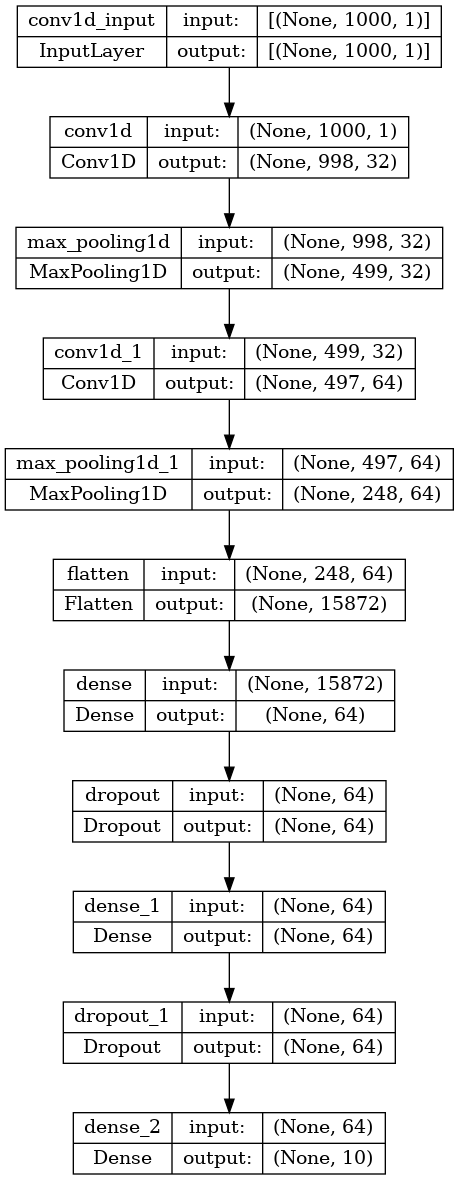

In [5]:
# Plot and save the model structure
model_structure_file = os.path.join(dir_output, 'model_structure.png')
plot_model(model, to_file=model_structure_file, show_shapes=True, show_layer_names=True)
print(f"Model structure saved to: {model_structure_file}")
display(Image(filename=model_structure_file))


In [6]:
# Print model structure
model.summary()
# Redirect the output of model.summary() to a file
model_summary_path = os.path.join(dir_output, 'model_summary.txt')
# Use context manager to open a file and write the model summary
with open(model_summary_path, 'w') as f:
    # Redirect standard output to the file
    model.summary(print_fn=lambda x: f.write(x + '\n'))

print(f"Model summary saved to: {model_summary_path}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 248, 64)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 15872)             0         
                                                                 
 dense (Dense)               (None, 64)                1

# Plot the loss curve of the training process

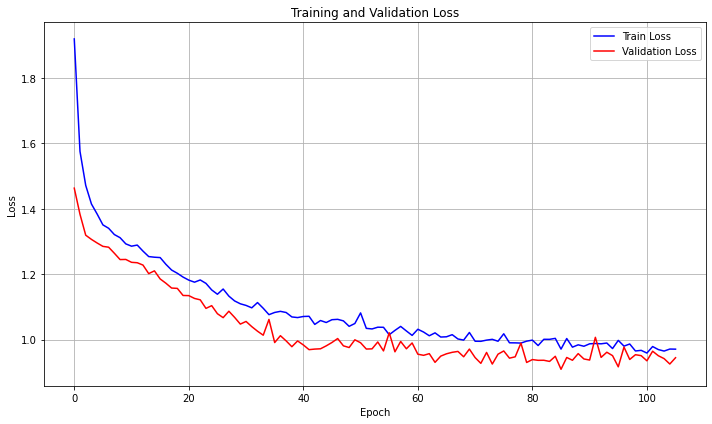

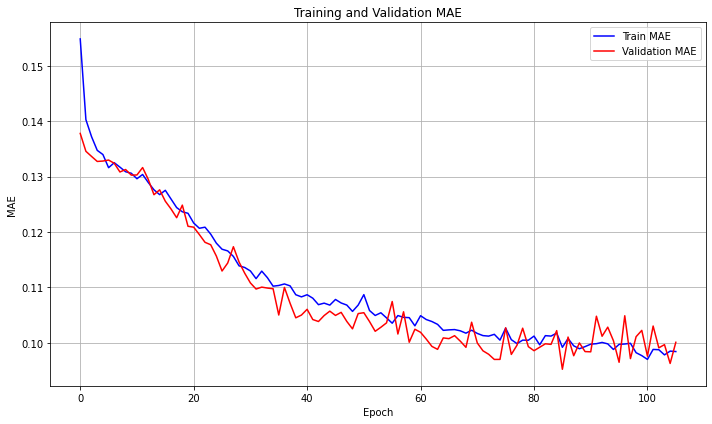

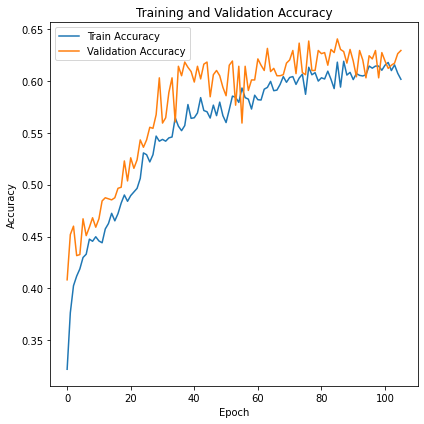

In [7]:
# Plot the fitting curve and training curve
plt.figure(figsize=(10, 6))
# Plot training loss and validation loss
#plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Train Loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss',color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'training_validation_loss.png'))
plt.show()
# Plot training MAE and validation MAE
#plt.subplot(1, 1, 1)
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE',color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE',color='red')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'training_validation_mae.png'))
plt.show()
# Plot training accuracy and validation accuracy
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_output, 'training_validation_metrics_classification.png'))
plt.show()

# Predict and calculate accuracy

## Prediction and Comparison:
- The trained model is used to predict the class probabilities for the test set (`X_test`).
- `y_test_classes`: The true class labels are converted from one-hot encoding to class indices, adjusted by `min_label`.
- `y_pred_classes`: The predicted class labels are derived by selecting the class with the highest probability from the model’s output.

## Accuracy Calculation:
- The accuracy is computed using `accuracy_score` by comparing the true and predicted class labels.

## Evaluation Metrics:
- **Mean Squared Error (MSE)**: Measures the average squared differences between true and predicted class labels.
- **R² Score**: Indicates the proportion of variance explained by the model; the closer to 1, the better.

## Save Predictions:
- The predicted class labels (`y_pred_classes`) are saved into a CSV file (`predictions_classification.csv`).

## Confusion Matrix:
- A confusion matrix is created to assess the model’s performance by showing the counts of true vs. predicted labels.
- The matrix is visualized with a heatmap, saved as `confusion_matrix.png`.

## Classification Report:
- A classification report is generated, displaying precision, recall, f1-score, and support for each class.
- The report is saved as `classification_report_classification.txt`.

## Plot True vs Predicted Values:
- A plot comparing true values (`y_test_classes`) and predicted values (`y_pred_classes`) is generated.
- The plot is saved as `true_vs_predicted_classification.png`.

## Output Files:
- **Predictions**: `predictions_classification.csv`
- **Confusion Matrix**: `confusion_matrix.png`
- **Classification Report**: `classification_report_classification.txt`
- **True vs Predicted Plot**: `true_vs_predicted_classification.png`


16/16 [==============================] - 0s 5ms/step


Test accuracy: 0.623482
Test MSE: 0.607287
Test R² Score: 0.929988
Test MAE Score: 0.449393


Test accuracy: 0.623482
Test MSE: 0.607287
Test R² Score: 0.929988
Test MAE: 0.4493927125506073


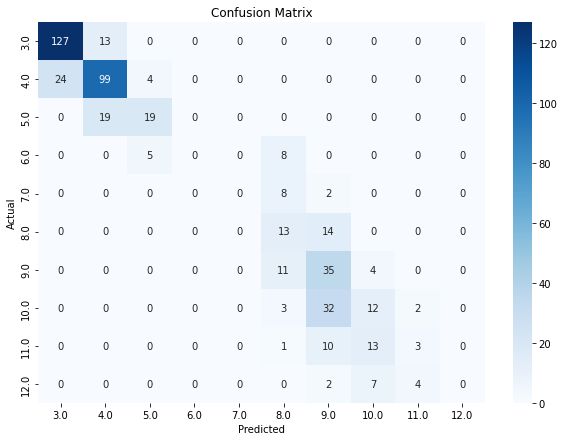

/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         3.0       0.84      0.91      0.87       140
         4.0       0.76      0.78      0.77       127
         5.0       0.68      0.50      0.58        38
         6.0       0.00      0.00      0.00        13
         7.0       0.00      0.00      0.00        10
         8.0       0.30      0.48      0.37        27
         9.0       0.37      0.70      0.48        50
        10.0       0.33      0.24      0.28        49
        11.0       0.33      0.11      0.17        27
        12.0       0.00      0.00      0.00        13

    accuracy                           0.62       494
   macro avg       0.36      0.37      0.35       494
weighted avg       0.59      0.62      0.59       494



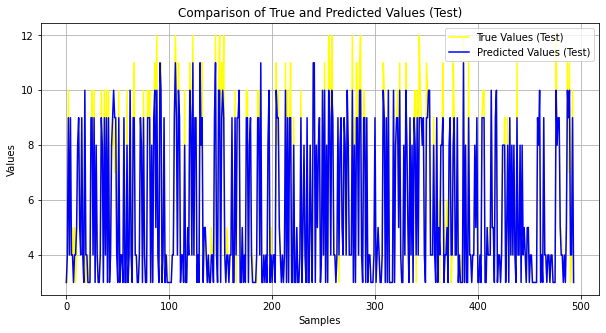

In [8]:
# Predict test set
y_pred_proba = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1) + min_label
y_pred_classes = np.argmax(y_pred_proba, axis=1)+min_label
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test accuracy: {test_accuracy:.6f}")
logging.info(f"Test accuracy: {test_accuracy:.6f}")
mse = mean_squared_error(y_test_classes, y_pred_classes)
r2 = r2_score(y_test_classes, y_pred_classes)
mae = mean_absolute_error(y_test_classes, y_pred_classes)
print(f"Test MSE: {mse:.6f}")
print(f"Test R² Score: {r2:.6f}")
print(f'Test MAE: {mae}')
logging.info(f"Test MSE: {mse:.6f}")
logging.info(f"Test R² Score: {r2:.6f}")
logging.info(f"Test MAE Score: {mae:.6f}")
# Save the prediction results
np.savetxt(os.path.join(dir_output, 'predictions_classification.csv'), y_pred_classes, delimiter=',', fmt='%d')
# Save the actual prediction comparison
#comparison = np.stack(y_test, y_pred_classes)
#np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Save the actual prediction comparison
comparison = np.stack((y_test_classes, y_pred_classes), axis=-1)
np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Plot the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
labels = np.arange(min_label, min_label + cm.shape[0])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(dir_output, 'confusion_matrix.png'))
plt.show()
# Print classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)
# Save classification report
report_path = os.path.join(dir_output, 'classification_report_classification.txt')
with open(report_path, 'w') as f:
    f.write(report)
# Draw a comparison chart of the predicted results and the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test_classes,label='True Values (Test)', color='yellow', linewidth=1.5)
plt.plot(y_pred_classes, label='Predicted Values (Test)', color='blue', linewidth=1.5)
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of True and Predicted Values (Test)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'true_vs_predicted_classification.png'))
plt.show()


